In [219]:
import numpy as np 
import numpy.random as rand 
import matplotlib.pyplot as plt 
import h5py 
from statsmodels.tsa import api as tsa 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.arima_model import ARIMA 
%matplotlib inline 

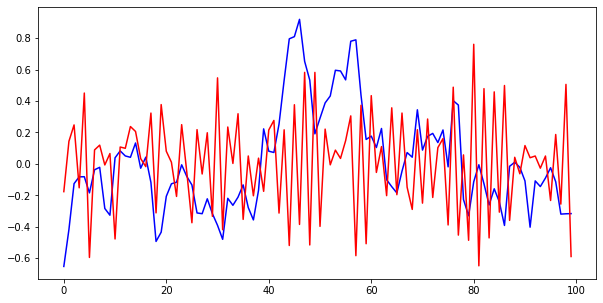

In [220]:
z1 = np.zeros(100) 
z2 = np.zeros(100) 
z1[0] = 1 
z2[0] = 1 
for i in range(100): 
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn() 
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn() 
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b') 
plt.plot(z2, 'r') 
plt.show() 

<Figure size 720x360 with 0 Axes>

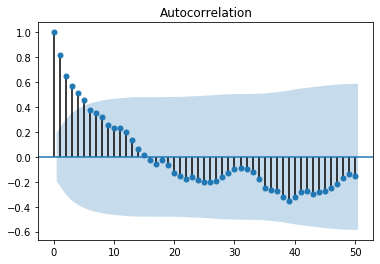

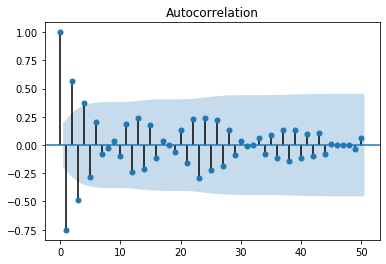

In [221]:
plt.figure(figsize = (10, 5)) 
plot_acf(z1, lags=50) 
plot_acf(z2, lags=50)
plt.show() 

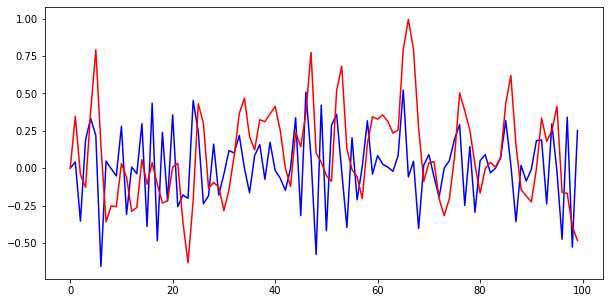

In [222]:
z3 = np.zeros(100) 
z4 = np.zeros(100) 
ar = 0.2 * np.random.randn(100) 
for i in range(1, 100): 
    z3[i] = ar[i] - 0.8 * ar[i - 1] 
    z4[i] = ar[i] + 0.8 * ar[i - 1] 
plt.figure(figsize = (10, 5)) 
plt.plot(z3, 'b') 
plt.plot(z4, 'r') 
plt.show() 

<Figure size 720x360 with 0 Axes>

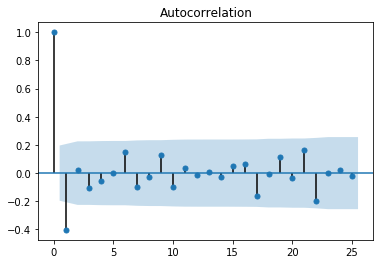

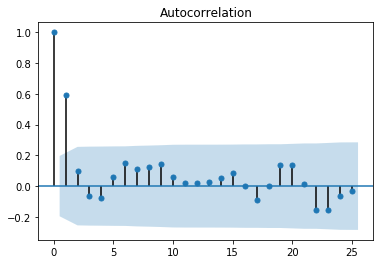

In [223]:
plt.figure(figsize = (10, 5)) 
plot_acf(z3, lags=25) 
plot_acf(z4, lags=25)
plt.show() 

п 11  - формуле соответствуют, все pk >= 2, действительно, равны нулю,  


а при k = 1, и Pz3 и Pz4 получается такие же, как и в предыдущих пунктах ( -0,488 и 0,488 соответственно)

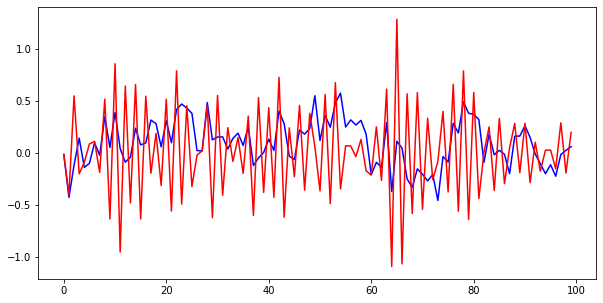

In [224]:
z5 = np.zeros(100) 
z6 = np.zeros(100) 
z5[0] = 1 
z6[0] = 1 
ar = 0.2 * np.random.randn(100) 
for i in range(100): 
    z5[i] = 0.8 * z5[i - 1]  + ar[i] - 0.3 * ar[i - 1] 
    z6[i] = -0.8 * z6[i - 1] + ar[i] - 0.3 * ar[i - 1] 
plt.figure(figsize = (10, 5))
plt.plot(z5, 'b') 
plt.plot(z6, 'r') 
plt.show() 

<Figure size 720x360 with 0 Axes>

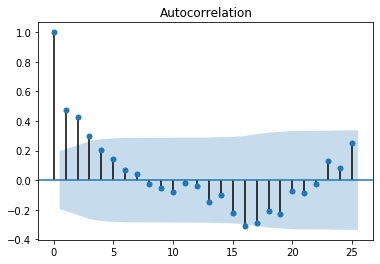

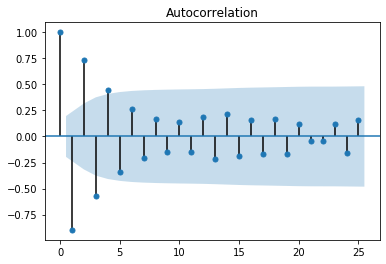

In [225]:
plt.figure(figsize = (10, 5)) 
plot_acf(z5, lags=25) 
plot_acf(z6, lags=25)
plt.show() 

In [226]:
from statsmodels.tsa.arima_process import arma_generate_sample 
ar = np.array([0.75, -0.25])  # задаем коэффициенты АР 
ma = np.array([0.65, 0.35])   # задаем коэффициенты СС    
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100) # создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов 

In [227]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 
0.45]

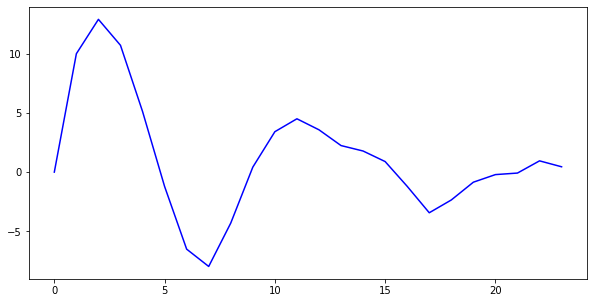

In [228]:
plt.figure(figsize = (10, 5))
plt.plot(TEST, 'b') 
plt.show() 

<Figure size 720x360 with 0 Axes>

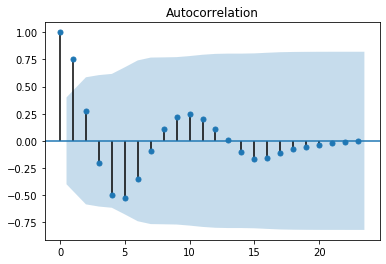

In [229]:
plt.figure(figsize = (10, 5)) 
plot_acf(TEST, lags=23) 
plt.show() 

In [230]:
arima1 = ARIMA(TEST, order = (1, 0, 0))  # создаем модель 
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(TEST, order = (2, 0, 0)) 
model_fit2 = arima2.fit(disp = False, trend='nc') 
print(model_fit2.summary()) 
arima3 = ARIMA(TEST, order = (3, 0, 0)) 
model_fit3 = arima3.fit(disp = False, trend='nc') 
print(model_fit3.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Tue, 24 Mar 2020   AIC                            128.850
Time:                        15:49:22   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


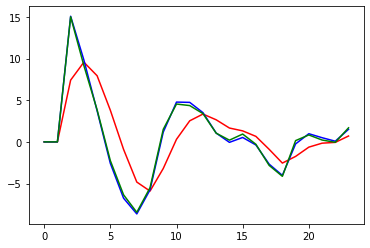

In [231]:
plt.plot(model_fit1.fittedvalues, 'r')
plt.plot(model_fit2.fittedvalues, 'b')
plt.plot(model_fit3.fittedvalues, 'g')
plt.show()

# в 28 и 29 получается, что для первого порядка 0,75 по графику функции автокорреляции, а значение функции, полученное, используя ARIMA , 0.7426, значит все верно


а для второго порядка значения 1,2857 и -0,6, в целом они приблеженны к полученным предыдущим значениям функции (1,51 и 0,96)


In [232]:
file = h5py.File('7.mat', 'r')  
data = file.get('z7')  
Z = np.array(data) 

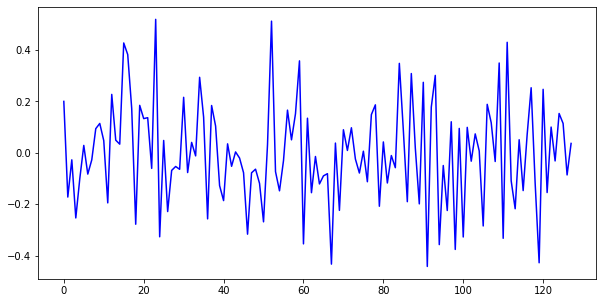

In [233]:
plt.figure(figsize = (10, 5))
plt.plot(Z, 'b') 
plt.show() 

<Figure size 720x360 with 0 Axes>

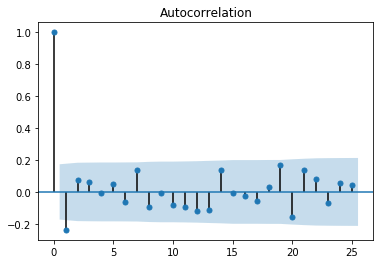

In [234]:
plt.figure(figsize = (10, 5)) 
plot_acf(Z, lags=25) 
plt.show() 

In [235]:
arima1 = ARIMA(Z, order = (1, 0, 0))  # создаем модель 
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 
arima2 = ARIMA(Z, order = (2, 0, 0)) 
model_fit2 = arima2.fit(disp = False, trend='nc') 
print(model_fit2.summary()) 
arima3 = ARIMA(Z, order = (3, 0, 0)) 
model_fit3 = arima3.fit(disp = False, trend='nc') 
print(model_fit3.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  29.436
Method:                       css-mle   S.D. of innovations              0.192
Date:                Tue, 24 Mar 2020   AIC                            -54.871
Time:                        15:49:27   BIC                            -49.167
Sample:                             0   HQIC                           -52.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.2379      0.086     -2.772      0.006      -0.406      -0.070
                                    Roots                                    
                  Real          Imaginary           M

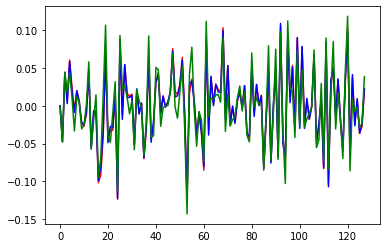

In [236]:
plt.plot(model_fit1.fittedvalues, 'r')
plt.plot(model_fit2.fittedvalues, 'b')
plt.plot(model_fit3.fittedvalues, 'g')
plt.show()

Третью модель сразу отбрасываем, не подходит полностью,  АР(1) и АР(2) близки, АР(2) почти не отличается от АР(1), но избыточен по числе параметров (2>1), а значит АР(1) является наиболее оптимальной моделью ВР.

In [237]:
arima1 = ARIMA(Z, order = (1, 0, 0))  # создаем модель 
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР 
print(model_fit1.summary()) # выводим таблицу результатов 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  29.436
Method:                       css-mle   S.D. of innovations              0.192
Date:                Tue, 24 Mar 2020   AIC                            -54.871
Time:                        15:49:32   BIC                            -49.167
Sample:                             0   HQIC                           -52.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.2379      0.086     -2.772      0.006      -0.406      -0.070
                                    Roots                                    
                  Real          Imaginary           M

Путем проверок пришел к выводу, что модель ARIMA(Z, order = (1, 0, 0)) является самой наилучшей для ВР по критерию BIC

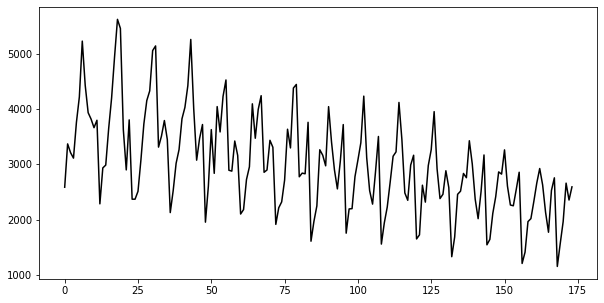

In [238]:
file = h5py.File('Fort.mat', 'r')  
data = file.get('Fort')  
Fort = np.array(data) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.show() 

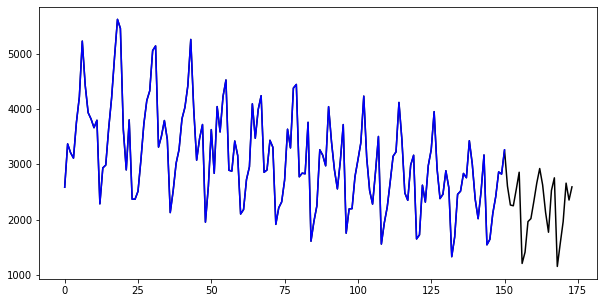

In [239]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки 
t=np.arange(0, len(Z), 1) # временная шкала для регрессии 
t=t.reshape(-1,1) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') # исходный ВР 
plt.plot(t, Z, 'b') # урезанный ряд 
plt.show() 

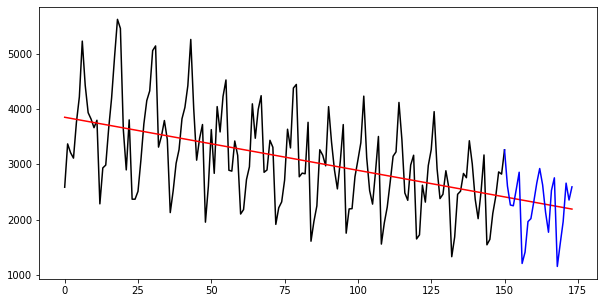

In [240]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда 
t=t.reshape(-1,1) 
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда 
t0=t0.reshape(-1,1) 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(t, Z) # модель регрессии 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон 
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения 
plt.show() 
 

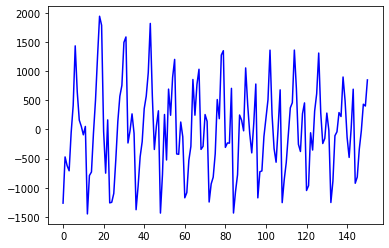

In [241]:
trend_as_func_of_t =reg.predict(t)
trend_as_func_of_t
Z_minus_trend =  Z-trend_as_func_of_t
plt.plot(Z_minus_trend, 'b')
plt.show() 

In [242]:
arimaz = ARIMA(Z_minus_trend, order = (4, 0, 9)) 
model_fit = arimaz.fit(disp = False) # подгоняем под ВР print(model_fit.summary()) 
print(model_fit.summary()) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(4, 9)   Log Likelihood               -1133.055
Method:                       css-mle   S.D. of innovations            421.715
Date:                Tue, 24 Mar 2020   AIC                           2296.110
Time:                        15:49:55   BIC                           2341.369
Sample:                             0   HQIC                          2314.497
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7852     21.879      0.127      0.899     -40.096      45.666
ar.L1.y        0.8121      0.106      7.665      0.000       0.604       1.020
ar.L2.y       -0.2420      0.175     -1.387      0.1

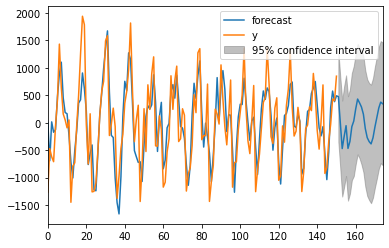

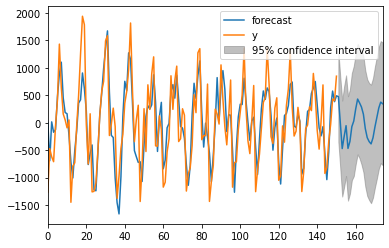

In [243]:
model_fit.plot_predict(0, len(Fort)) 

<Figure size 720x360 with 0 Axes>

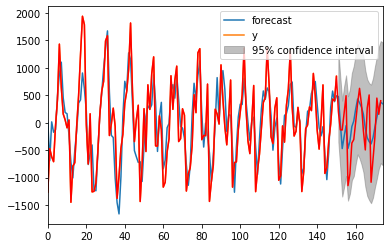

In [245]:
trend_as_func_of_t0 =reg.predict(t0)
#Z_minus_trend0 =  Fort-trend_as_func_of_t0
plt.figure(figsize = (10, 5)) 
model_fit.plot_predict(0, len(Fort)) # прогноз по АРПСС 
plt.plot(t0, Fort-(trend_as_func_of_t0), 'r') # исходный ВР минус тренд 
plt.show() 

In [248]:
Z_minus_trend0 =  Fort-trend_as_func_of_t0
Z_minus_trend0 

array([[-1264.23884629],
       [ -471.6493482 ],
       [ -620.05985012],
       [ -709.47035204],
       [  -54.88085396],
       [  414.70864413],
       [ 1433.29814221],
       [  643.88764029],
       [  159.47713838],
       [   53.06663646],
       [  -92.34386546],
       [   51.24563262],
       [-1449.16486929],
       [ -790.57537121],
       [ -729.98587313],
       [  -59.39637504],
       [  502.19312304],
       [ 1248.78262112],
       [ 1941.37211921],
       [ 1786.96161729],
       [  -33.44888463],
       [ -749.85938655],
       [  163.73011154],
       [-1259.68039038],
       [-1250.0908923 ],
       [-1098.50139421],
       [ -520.91189613],
       [  137.67760195],
       [  570.26710003],
       [  754.85659812],
       [ 1492.4460962 ],
       [ 1586.03559428],
       [ -232.37490763],
       [  -24.78540955],
       [  266.80408853],
       [  -67.60641338],
       [-1377.0169153 ],
       [ -971.42741722],
       [ -467.83791914],
       [ -210.24842105],


In [247]:
hor = model_fit.predict(len(Z), len(Fort)) 
hor=hor.reshape(-1,1)
hor

array([[ 4.77287301e+02],
       [ 3.08060506e-01],
       [-4.70351123e+02],
       [-2.50392811e+02],
       [-5.31320286e+01],
       [-4.67800033e+02],
       [-3.41143302e+02],
       [-7.10898347e+01],
       [ 3.09860565e+01],
       [ 2.49789549e+02],
       [ 4.31920076e+02],
       [ 3.63081230e+02],
       [ 2.87131496e+02],
       [ 1.56824766e+02],
       [-1.06743505e+02],
       [-2.71313708e+02],
       [-3.43558780e+02],
       [-3.85574638e+02],
       [-2.73326650e+02],
       [-7.69724224e+01],
       [ 9.21246564e+01],
       [ 2.68515288e+02],
       [ 3.76167075e+02],
       [ 3.47056775e+02]])

In [179]:
def me(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = differences.mean()
    return mean_of_differences    

In [249]:
me(hor,Z_minus_trend0[-24:])

406.68358453031243

In [191]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

In [250]:
rmse(hor,Z_minus_trend0[-24:])

495.5488985315873

In [193]:
def mape(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = (differences/predictions)*100 
    mape_val = mean_of_differences.mean() 
    return mape_val

In [251]:
mape(hor, Z_minus_trend0[-24:])

2710.0226435122263

In [ ]:
# Вопрос с mape, не понимаю, что делаю не так с mape, беру вроде как правильные параметры и считаю верно, хотелось бы уточнить, почему получается такой процент?

In [208]:
arimaz = ARIMA(Z, order = (4, 0, 9)) 
model_fit = arimaz.fit(disp = False) # подгоняем под ВР print(model_fit.summary()) 
print(model_fit.summary()) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(4, 9)   Log Likelihood               -1158.747
Method:                       css-mle   S.D. of innovations            502.742
Date:                Tue, 24 Mar 2020   AIC                           2347.493
Time:                        15:42:30   BIC                           2392.752
Sample:                             0   HQIC                          2365.880
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3140.2123     95.495     32.884      0.000    2953.046    3327.379
ar.L1.y        0.8764      0.116      7.585      0.000       0.650       1.103
ar.L2.y       -0.2184      0.234     -0.932      0.3

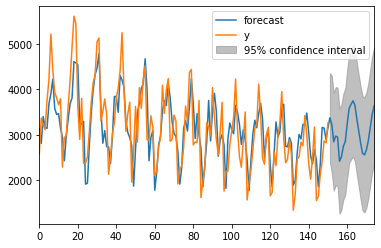

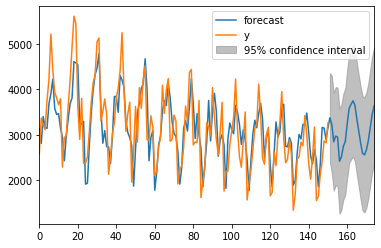

In [209]:
model_fit.plot_predict(0, len(Fort)) 

In [213]:
print(me(reg.predict(t0),Fort))
print(rmse(reg.predict(t0),Fort))
print(mape(reg.predict(t0), Fort))

574.0522363713577
724.3053397632452
18.994269842943016


# Поэтому вопрос, почему при оценке вот здесь для оригинального ряда Fort все получается верно? А если посмотреть на предыдущий пункт 43, то получается mape 2710 процентов?
